<a href="https://colab.research.google.com/github/sinaapolo969/numericalAnalysis/blob/main/Significant_Figures_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asignment title : Significant Figures Assignment
## Author : Sina Tayebi
### course : undergraduate numerical analysis

## First Question:
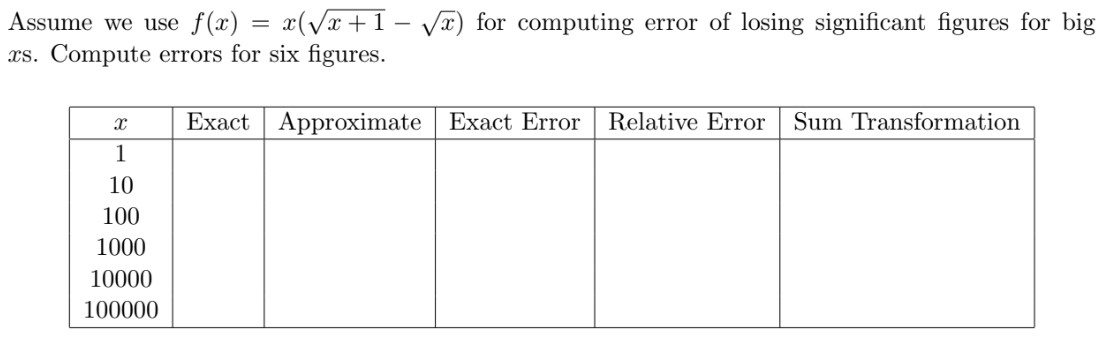



In [24]:
import sympy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd

In [16]:
def function(x):
  return x * (math.sqrt(x + 1) - math.sqrt(x))

In [57]:
def calculating_error(f, function, X):
  x = sp.symbols('x')
  exact = []
  estimate = []
  E_errors = []
  R_errors = []
  s_transformation = []

  for i in X:
    # estimation with tailor series
    t_series = sp.series(f, x, i, 4)
    t_series = t_series.removeO()
    estimated = t_series.subs(x, i).evalf()
    estimate.append(estimated)
    true_value = function(i)
    exact.append(true_value)
    # calculating relation error
    r_error = abs(estimated - true_value) / true_value
    R_errors.append(r_error)
    # calculating exact error 
    e_error = abs(estimated - true_value)
    E_errors.append(e_error)
    # calculating su, transformation
    s_transformation.append((estimated - true_value) * (estimated + true_value))
  return exact, estimate, R_errors, E_errors, s_transformation

In [45]:
x = sp.symbols('x')
f = x * (sp.sqrt(x + 1) - sp.sqrt(x))
X = [1, 10, 100, 1000, 10000, 100000]
exact, estimate, R_errors, E_errors, s_transformation = calculating_error(f, function, X)

In [46]:
df = pd.DataFrame({'exact' : exact,
                   'estimated' : estimate,
                   'relation_error' : R_errors,
                   'exact_error' : E_errors,
                   'sum_transformation' : s_transformation}, index = [1, 10, 100, 1000, 10000, 100000])
df

,exact,estimated,relation_error,exact_error,sum_transformation
1,0.414214,0.414213562373095,2.68031548330893e-16,1.11022302462516e-16,-9.19738868117237e-17
10,1.543471,1.54347130187021,1.43860533497437e-15,2.22044604925031e-15,6.85438950873786e-15
100,4.987562,4.98756211208903,6.41083206396648e-15,3.19744231092045e-14,3.18948842510743e-13
1000,15.807437,15.8074374289558,1.14060371903692e-13,1.80300219199125e-12,-5.70016886683471e-11
10000,49.998750,49.9987500624961,2.13026037565597e-13,1.06510356090439e-11,1.06507693464655e-9
100000,158.113488,158.113487725688,6.42265054396117e-13,1.01550767794834e-10,3.21130921545149e-8


## Second Question:
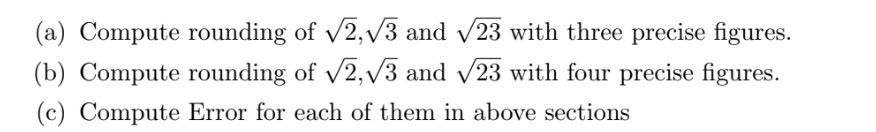

In [39]:
  numbers = [sp.sqrt(2).evalf(), sp.sqrt(3).evalf(), sp.sqrt(23).evalf()]

In [40]:
def set_prices(p):
  rounded = []
  errors = []
  for number in numbers:
    r = round(number, p)
    rounded.append(r)
    errors.append(abs(number - r))
  return rounded, errors

In [42]:
# calculate with 3 prices
rounded, errors = set_prices(3)
df = pd.DataFrame({'numbers' : numbers,
                   'rounded' : rounded,
                   'errors' : errors})
df

,numbers,rounded,errors
0,1.41421356237310,1.414,0.000212097529345145
1,1.73205080756888,1.732,5.61786626271932e-5
2,4.79583152331272,4.796,0.000188984499780886


In [43]:
# calculate with 4 prices
rounded, errors = set_prices(4)
df = pd.DataFrame({'numbers' : numbers,
                   'rounded' : rounded,
                   'errors' : errors})
df

,numbers,rounded,errors
0,1.41421356237310,1.4142,1.37332715326455e-5
1,1.73205080756888,1.7321,4.87255121774943e-5
2,4.79583152331272,4.7958,3.22679416253635e-5


### part d)
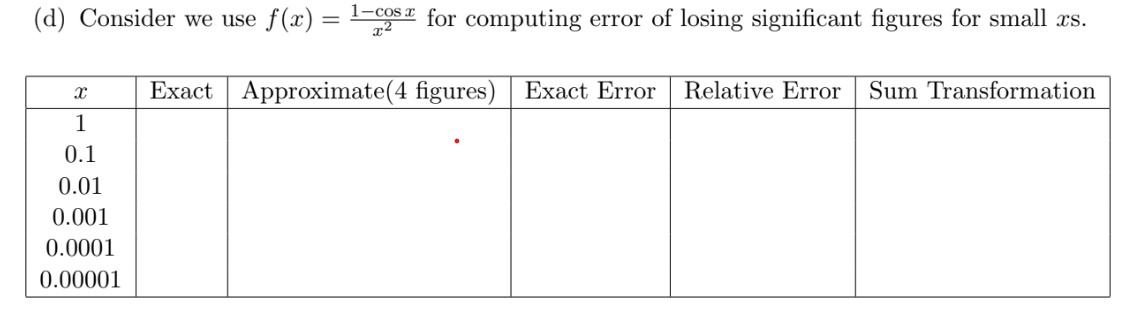

In [54]:
def function1(x):
  return (1 - math.cos(x)) / x**2

In [55]:
x = sp.symbols('x')
f = (1 - sp.cos(x)) / x**2
X = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
exact, estimate, R_errors, E_errors, s_transformation = calculating_error(f, function1, X)

In [56]:
df = pd.DataFrame({'exact' : exact,
                   'estimated' : estimate,
                   'relation_error' : R_errors,
                   'exact_error' : E_errors,
                   'sum_transformation' : s_transformation}, index = X)
df

,exact,estimated,relation_error,exact_error,sum_transformation
1.00000,0.459698,0.459697694131860,1.20755774805638e-16,5.55111512312578e-17,5.10366964392284e-17
0.10000,0.499583,0.499583472197429,2.24452031997628e-14,1.12132525487141e-14,1.12039112858264e-14
0.01000,0.499996,0.499995833347366,1.11023227652963e-16,5.55111512312578e-17,-5.55106886398889e-17
0.00100,0.500000,0.499999958325503,1.11022311716114e-16,5.55111512312578e-17,-5.55111466044592e-17
0.00010,0.500000,0.499999996961264,1.11022303137250e-16,5.55111512312578e-17,-5.55111508938904e-17
0.00001,0.500000,0.500000041370185,0,0,0
